In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st

from scipy.optimize import fmin
from scipy import integrate

In [2]:
#################
# Задание 1.2.1 #
#################

In [3]:
def generate_sample(density, n, a, b):
    """
    Генерирует выборку методом Неймана
    density - плотность распределения
    n - количество генерируемых элементов выборки
    a, b - интервал
    """    
    # Генерируем вспомогательные значения
    def generate_un(n):
        return np.random.uniform(0, 1, n)
    
    sample = [] 
    
    # Максимум плотности распределения
    M = density(fmin(lambda x: -density(x, b), 0, disp = False), b)[0]

    # Генерируем реализацию density
    while len(sample) != n:
        u1, u2 = generate_un(2)
        x1 = a + (b - a) * u1
        x2 = M * u2
        
        # Если значение подходит, добавляем его
        if x2 <= density(x1, b):
            sample.append(x1)
    
    return sample

In [4]:
def density(x, K):
    A = 1 / integrate.quad(lambda x: x ** 3 * (K - x), 0, K)[0]
    
    return A * x ** 3 * (K - x)

In [5]:
def ruin(sample, V):
    if sum(sample) >= V:
        return True
    return False

In [6]:
def ruin_p(ruins):
    return len([ruin for ruin in ruins if ruin]) / len(ruins)

In [7]:
K = 1489 # Максимальная выплата
N = 500 # Число выплат
V  = 500000 # Лимит

count = 1000 # Число экспериментов
ruins = []
var_arr = []
mean_arr = []

# Метод Монте-Карло
for c in range(0, count):
    sample = generate_sample(density, N, 0, K)
    
    mean_arr.append(np.mean(sample))
    ruins.append(ruin(sample, V))

In [8]:
ruin_p(ruins)

0.246

In [9]:
# Аппроксимация на основе ЦПТ
#std = np.std(mean_arr)
#mean = np.mean(mean_arr)

A = 1 / integrate.quad(lambda x: x ** 3 * (K - x), 0, K)[0]
mean = integrate.quad(lambda x: x * density(x, K), 0, K)[0]
var = integrate.quad(lambda x: (x - mean) ** 2 * density(x, K), 0, K)[0]
std = math.sqrt(var)
#print(mean)
#print(std)
#1 - st.norm.cdf(V / N, mean, std)
#1 - integrate.quad(lambda x: density((V - N * mean) / (std * math.sqrt(N)), K))[0]
X = (V - N * mean) / (std * math.sqrt(N))
#print(X)
print(1 - st.norm.cdf(X, 0, 1))

0.26826021602140815


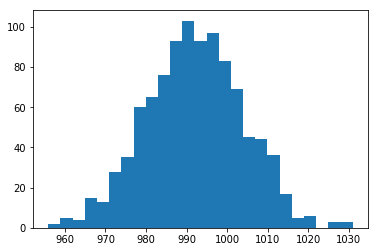

In [10]:
_ = plt.hist(mean_arr, bins = 25)